## Credit Card Fraud Detection

In this project we will predict fraudulent credit card transactions with the help of Machine learning models. Lets import the following libraries to get started.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for DS
import numpy as np
import pandas as pd

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for Model Building and evaluation
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

## Exploratory data analysis

In [2]:
# Reading the file
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

So data has no null values

In [7]:
# Checking for distribution of classes in our data

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(classes)
print(f"Normal Share {normal_share}")
print(f"fraud_share {fraud_share}")

0    284315
1       492
Name: Class, dtype: int64
Normal Share 99.82725143693798
fraud_share 0.1727485630620034


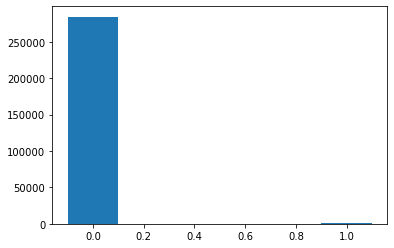

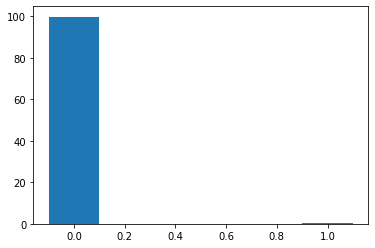

In [8]:
# Creating a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.bar([0,1],classes, width=.2)
plt.show()
plt.bar([0,1], [normal_share,fraud_share], width=.2)
plt.show()

So we see that data is skewned and there is high class imbalance 

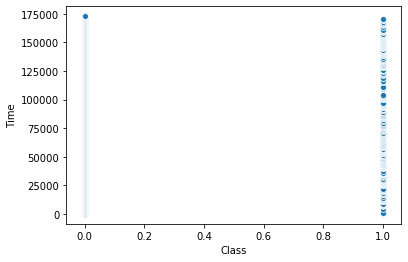

In [9]:
# Creating a scatter plot to observe the distribution of classes with time
sns.scatterplot(x='Class',y='Time', data=df, alpha=1)

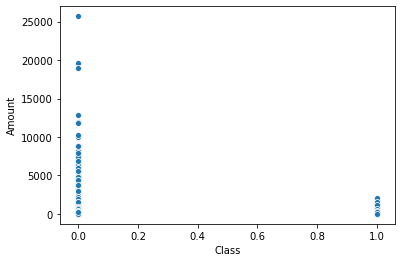

In [10]:
# Creating a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x= df['Class'], y=df['Amount'] , data =df)

In [11]:
# Drop unnecessary columns
df.drop(columns = 'Time',inplace= True)

### Splitting the data into train & test data

In [12]:
X = df.drop(columns = ['Class'])
y = df['Class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state=100)

In [14]:
x_col = X_train.columns

In [15]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


In [16]:
# Scaling the amount column

scaler = StandardScaler()
X_train[['Amount']]  = scaler.fit_transform(X_train[['Amount']])
X_test[['Amount']] = scaler.transform(X_test[['Amount']])

### Plotting the distribution of a variable

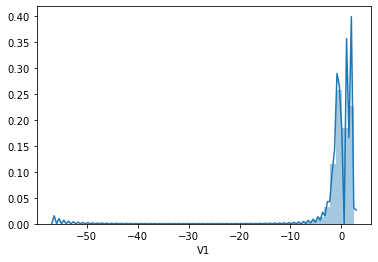

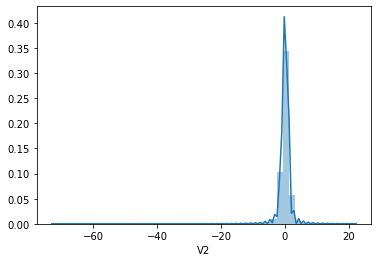

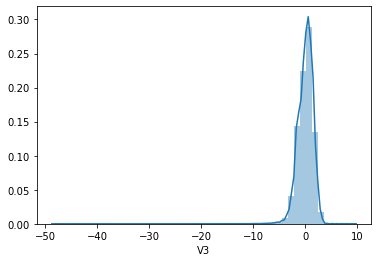

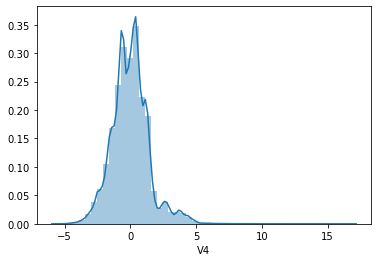

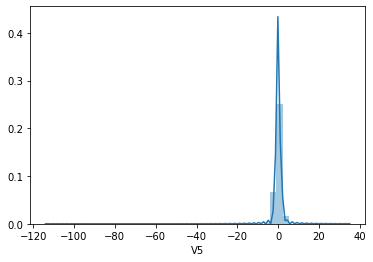

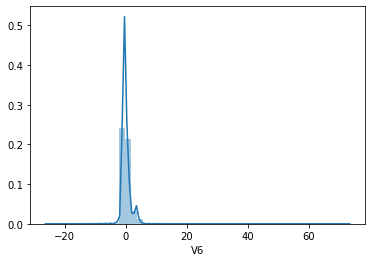

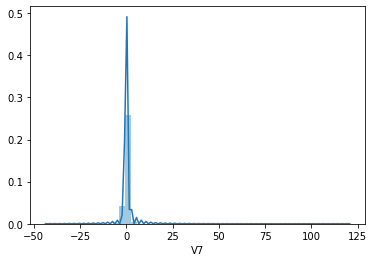

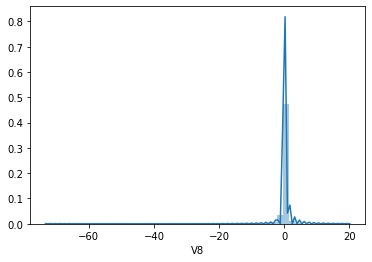

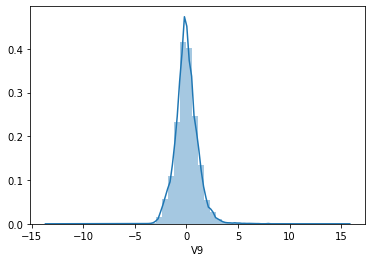

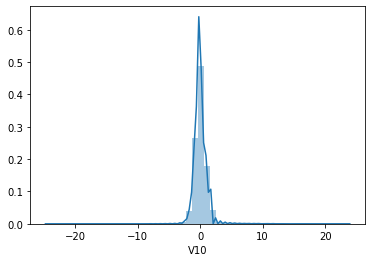

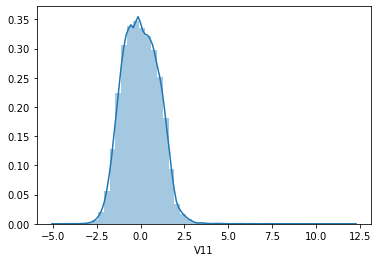

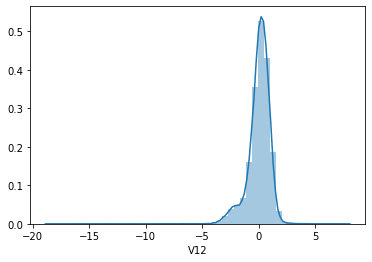

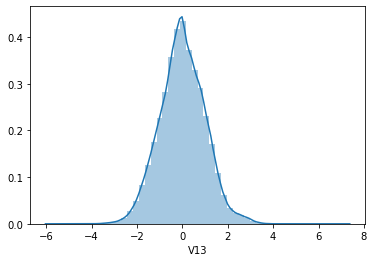

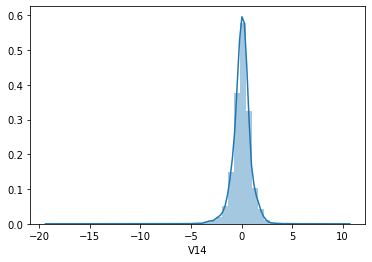

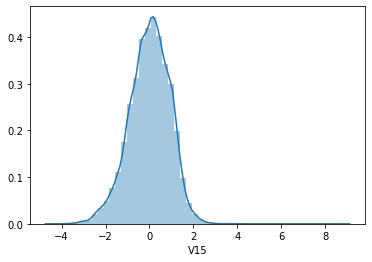

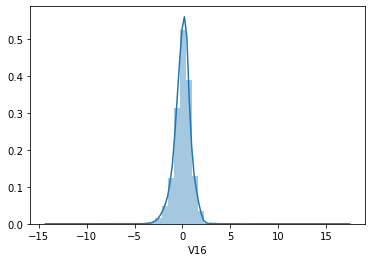

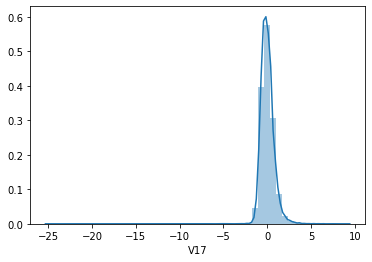

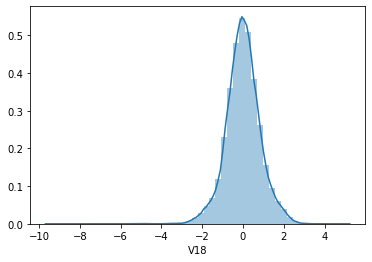

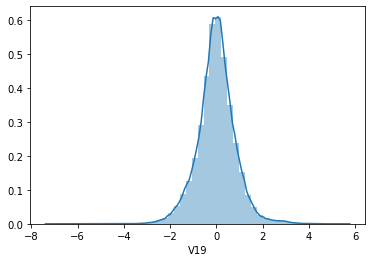

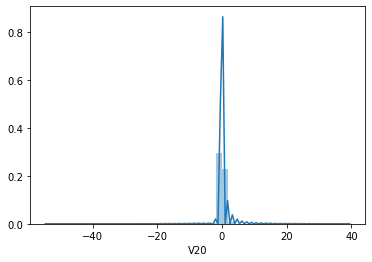

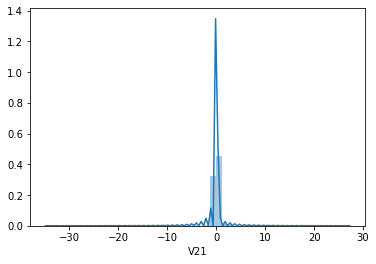

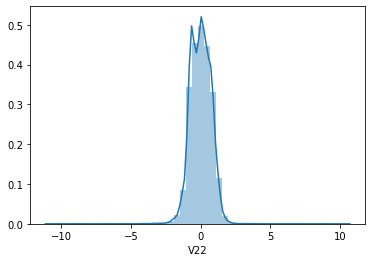

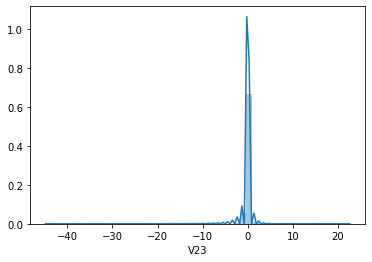

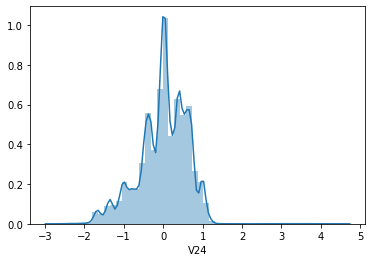

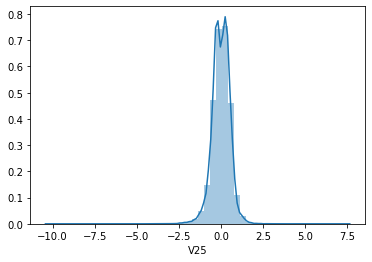

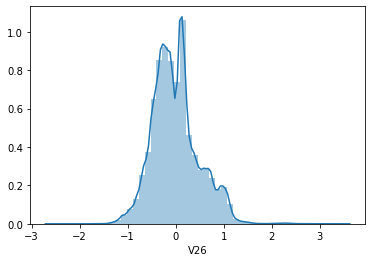

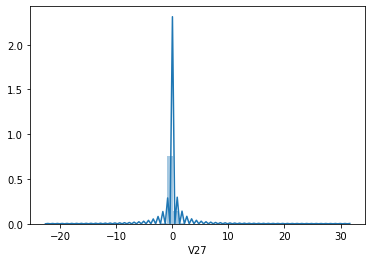

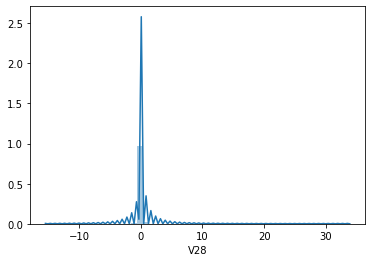

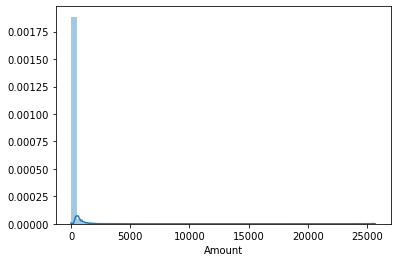

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
columns = ['V' + str(i) for i in range (1,29)]
columns.append('Amount')

for i in columns:
    sns.distplot(df[i],hist=True)
    plt.show()

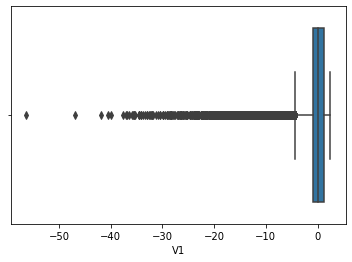

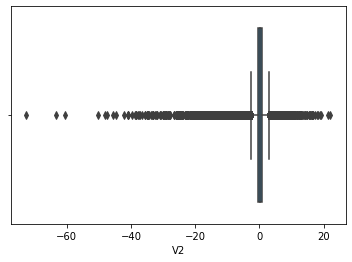

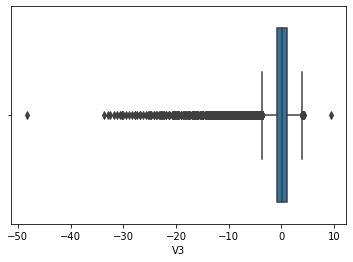

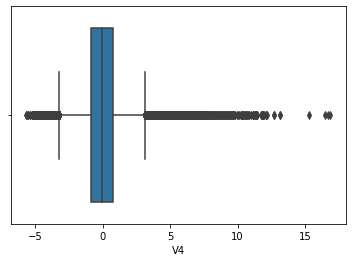

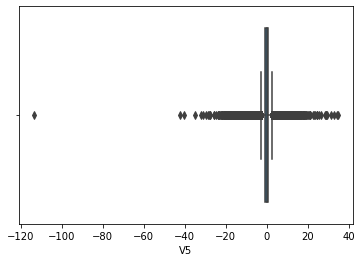

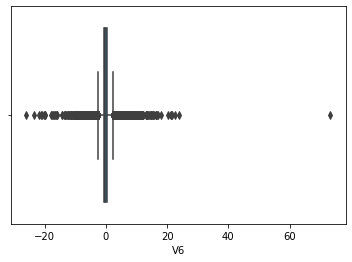

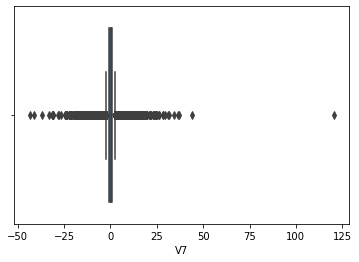

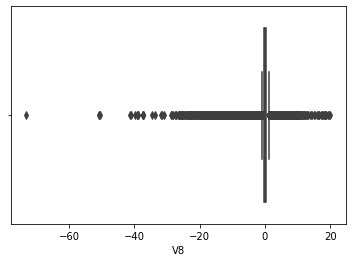

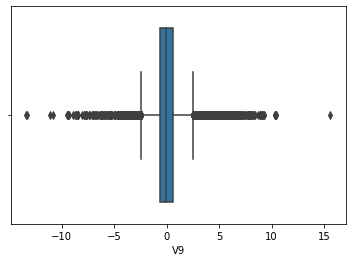

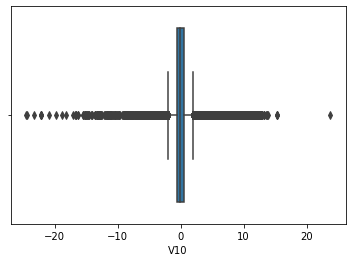

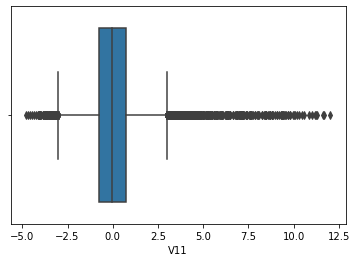

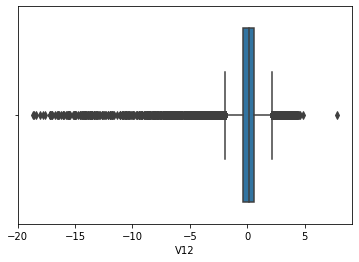

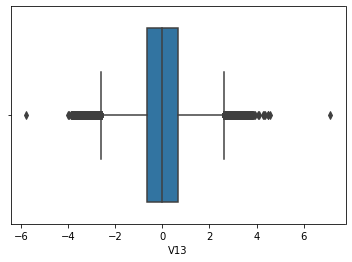

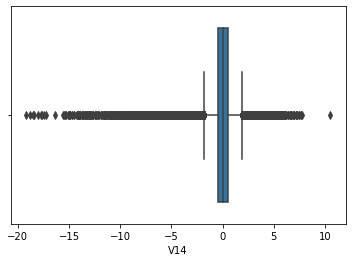

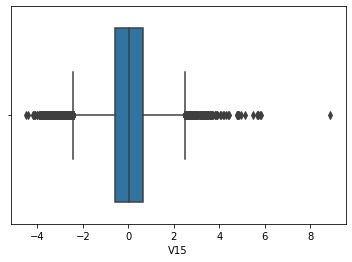

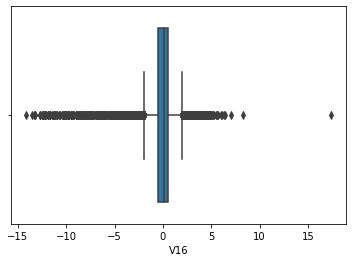

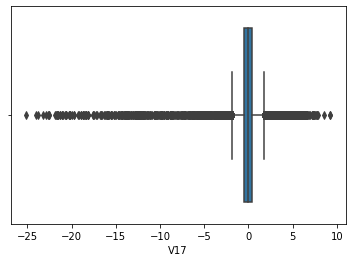

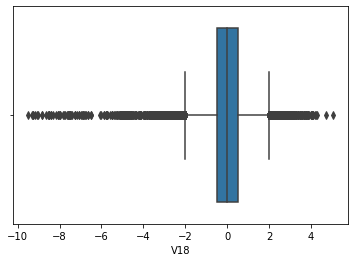

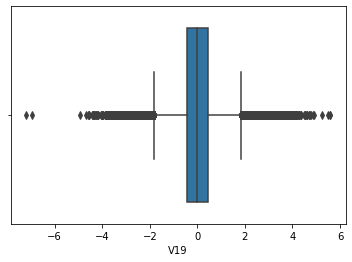

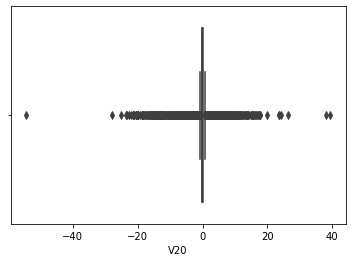

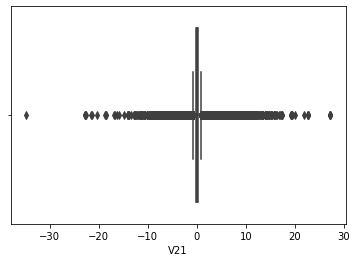

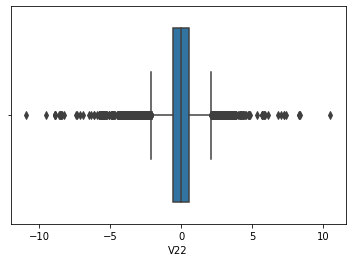

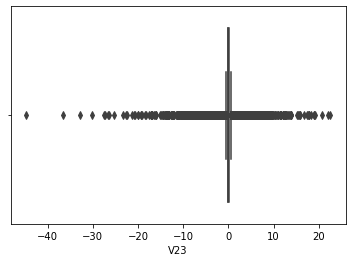

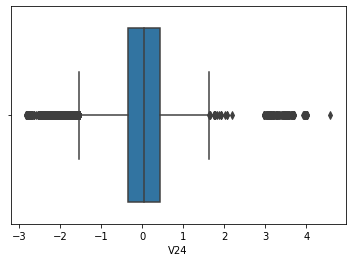

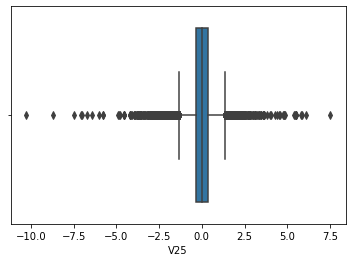

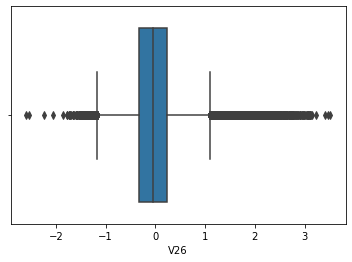

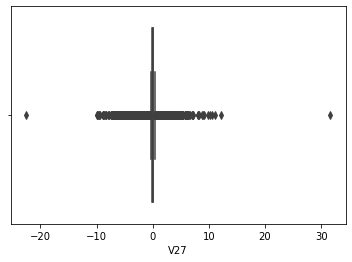

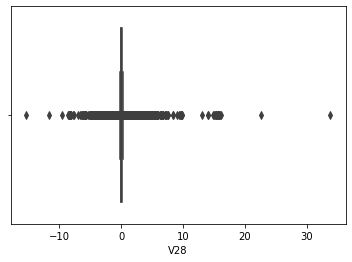

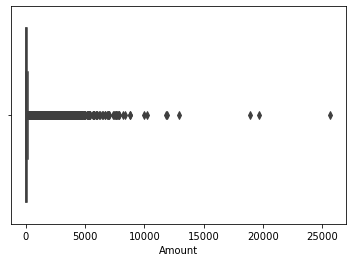

In [18]:
# Boxplot to check for outliers

for i in columns:
    sns.boxplot(df[i])
    plt.show()

In [19]:
# Checking the skewness of data
df.skew()

V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

### There is skewness present in the distribution. Using power transfromer to remove skewness


In [20]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer()

X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

In [21]:
X_train = pd.DataFrame (data = X_train, columns = x_col, index =y_train.index)
X_test = pd.DataFrame (data = X_test, columns = x_col, index = y_test.index)

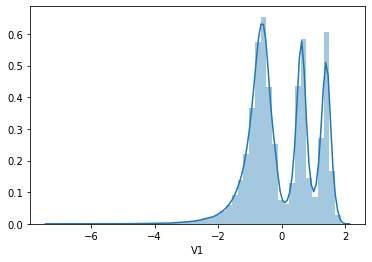

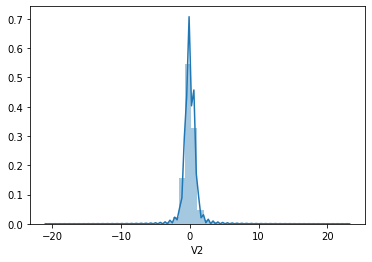

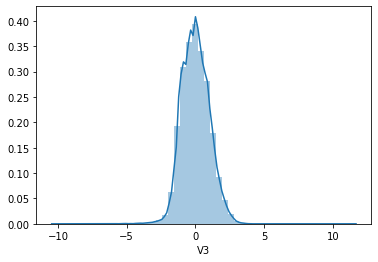

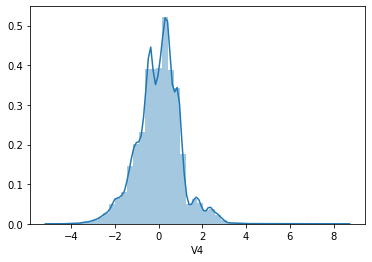

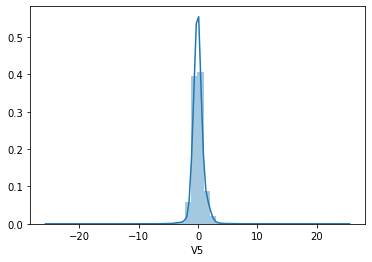

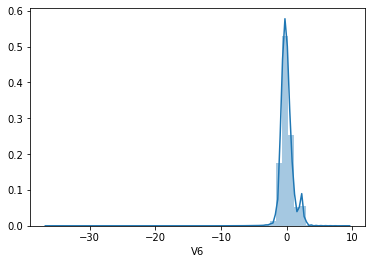

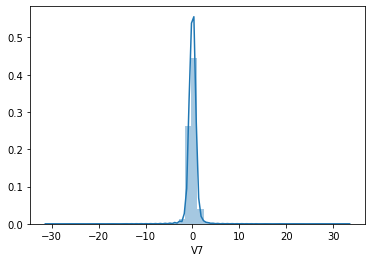

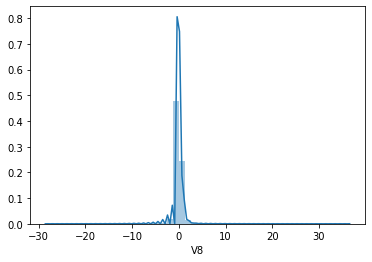

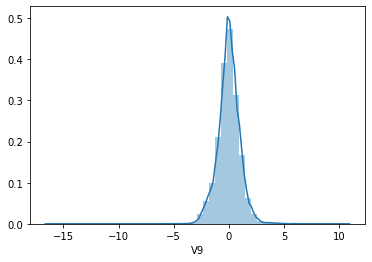

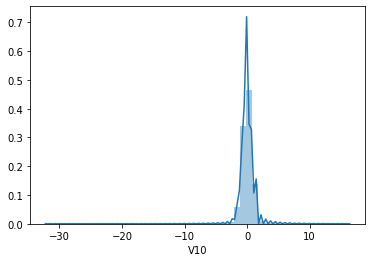

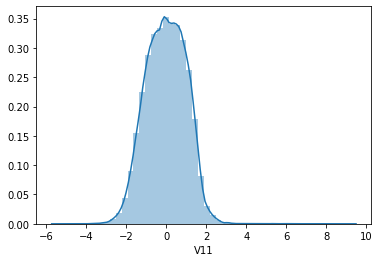

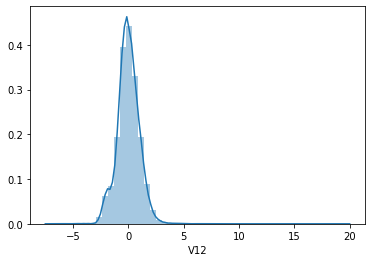

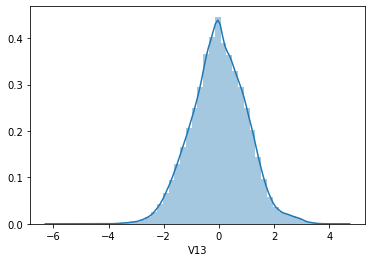

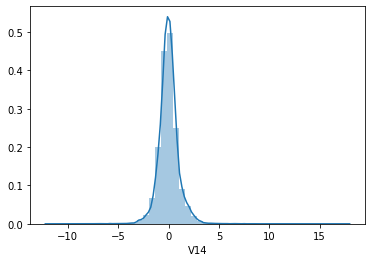

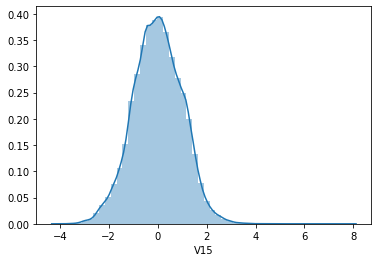

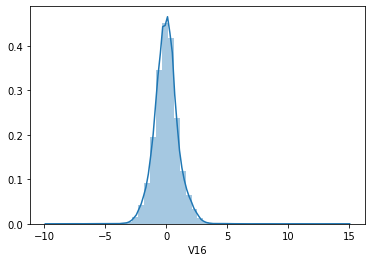

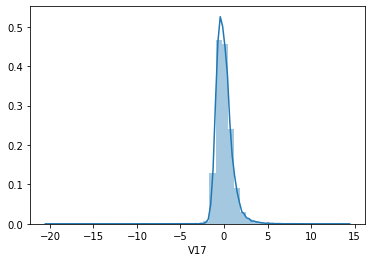

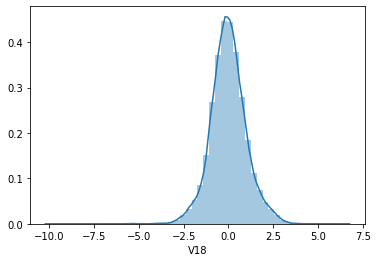

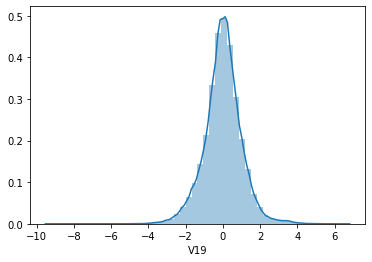

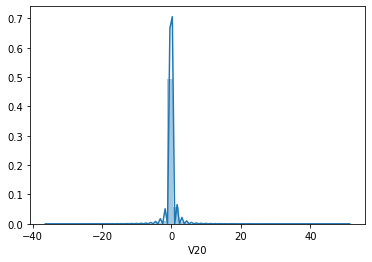

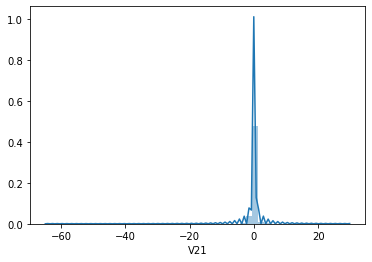

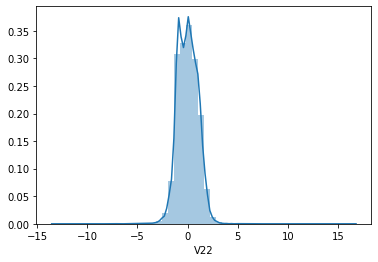

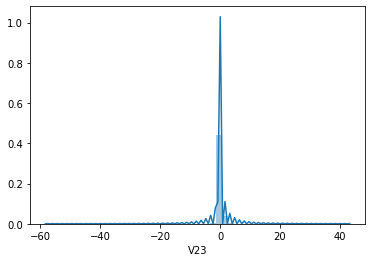

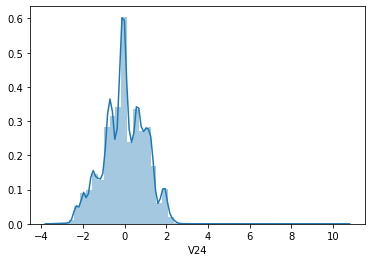

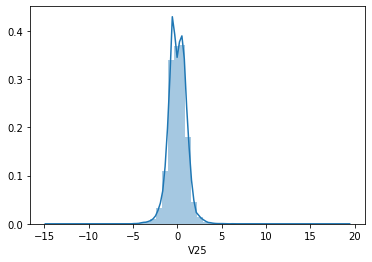

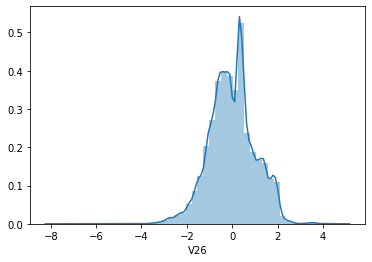

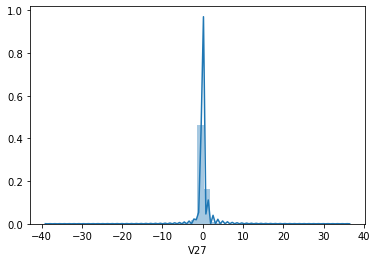

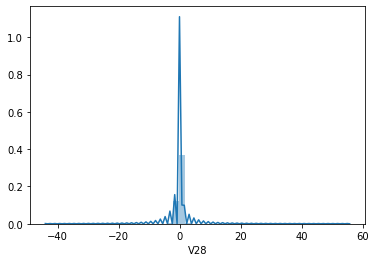

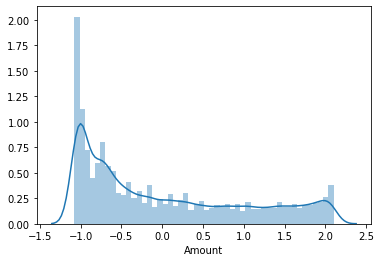

In [26]:
# plot the histogram of a variable from the dataset again to see the result 
for i in columns:
    sns.distplot(X_train[i])
    plt.show()

In [27]:
X_train.skew()

V1       -0.217901
V2        0.327536
V3       -0.076278
V4        0.018001
V5       -0.259221
V6       -1.954194
V7        0.523162
V8        2.190573
V9       -0.041243
V10      -1.225595
V11       0.062110
V12       0.165385
V13       0.005754
V14       0.108570
V15       0.008701
V16       0.031705
V17      -0.769422
V18      -0.061911
V19       0.014327
V20      -0.406100
V21      -2.097909
V22      -0.028312
V23      -0.195922
V24       0.109645
V25       0.084403
V26      -0.025424
V27       1.023651
V28       1.131227
Amount    0.707642
dtype: float64

## Model Building
- Building different models on the imbalanced dataset and see the result

### Logistic Regression

In [25]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)

folds = StratifiedKFold(100,shuffle = True, random_state = 100)

In [26]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [1.0, 0.1, 0.015, 0.01, 0.005]

params = {'solver' : solvers,'penalty' : penalty, 'C' : c_values}


#perform cross validation

lr_model_cv = GridSearchCV(estimator = logreg, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
lr_model_cv.fit(X_train,y_train)
cv_results = pd.DataFrame(lr_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", lr_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", lr_model_cv.best_params_)

Fitting 100 folds for each of 30 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1346 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 1896 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 2546 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 19.9min finished


Best AUC:  0.9852598657947361
Best hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [27]:
# predict on test data
y_pred = lr_model_cv.predict(X_test)

# check area under curve
y_pred_prob = lr_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC:    	 0.97


### KNN

1
3
5
7
9
11


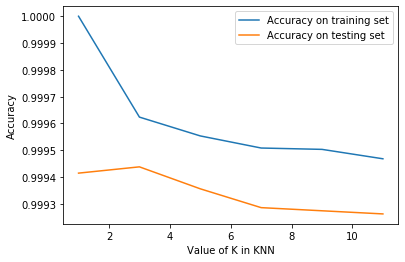

In [27]:
k_range = range(1, 11, 2)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train,y_train)
    score1.append(knn.score(X_train,y_train))
    score2.append(knn.score(X_test,y_test))
    print(k)
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

Seems like 3 is the best choice

In [22]:
n_neighbors = [3]
weights = ['uniform','distance']
#metric = ['euclidean', 'manhattan']
# impossible to run 100 fold on KNN in this lifetime, currently find the best weight
folds = StratifiedKFold(5,shuffle = True, random_state = 100)
params = {'n_neighbors' : n_neighbors,'weights' : weights}
knn=KNeighborsClassifier(n_jobs=-1)

#perform cross validation

knn_model_cv = GridSearchCV(estimator = knn, param_grid = params, cv=folds, scoring ='roc_auc', return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
knn_model_cv.fit(X_train,y_train)
cv_results = pd.DataFrame(knn_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC: ", knn_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", knn_model_cv.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 19.4min finished


Best AUC:  0.9994984046760182
Best hyperparameters:  {'n_neighbors': 3, 'weights': 'uniform'}


In [24]:
n_neighbors = [3]
weights = ['uniform']
metric = ['euclidean', 'manhattan']
# impossible to run 100 fold on FNN in this lifetime, currently finding the best metric
folds = StratifiedKFold(5,shuffle = True, random_state = 100)
params = {'n_neighbors' : n_neighbors,'weights' : weights, 'metric' : metric}
knn = KNeighborsClassifier(n_jobs=-1)

#perform cross validation

knn_model_cv = GridSearchCV(estimator = knn, param_grid = params, cv=folds, scoring ='roc_auc', return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
knn_model_cv.fit(X_train,y_train)
cv_results = pd.DataFrame(knn_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC: ", knn_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", knn_model_cv.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 26.4min finished


Best AUC:  0.9994984049276197
Best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [28]:
# Building the final KNN model using cv with best parameters
n_neighbors = [3]
weights = ['uniform']
metric = ['manhattan']
# impossible to run 100 fold on FNN in this lifetime, currently finding the best metric
folds = StratifiedKFold(100, shuffle = True, random_state = 100)
params = {'n_neighbors' : n_neighbors,'weights' : weights, 'metric' : metric}
knn = KNeighborsClassifier(n_jobs=-1)

#perform cross validation

final_knn_model_cv = GridSearchCV(estimator = knn, param_grid = params, cv=folds, scoring ='roc_auc', return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
final_knn_model_cv.fit(X_train,y_train)
cv_results = pd.DataFrame(final_knn_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", final_knn_model_cv.best_score_)

#print the optimum value of hyperparameters

#print("Best hyperparameters: ", final_knn_model_cv.best_params_)
print("Best hyperparameters: ", final_knn_model_cv.best_params_)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 117.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 415.8min finished


Best AUC:  0.9190766390549769
Best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [29]:
# predict on test data
y_pred = final_knn_model_cv.predict(X_test)

# check area under curve
y_pred_prob = final_knn_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC:    	 0.91


### Decision Tree

In [19]:
# Create the parameter grid 
folds = StratifiedKFold(100, shuffle = True, random_state = 100)
param_grid = {
    'max_depth': [4,5,6],
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 151, 50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
final_dtree_model_cv = GridSearchCV(estimator = dtree, param_grid = param_grid, scoring ='roc_auc', return_train_score=True,
                          cv = folds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
final_dtree_model_cv.fit(X_train,y_train)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", final_dtree_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", final_dtree_model_cv.best_params_)

Fitting 100 folds for each of 36 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 21.7min finished


Best AUC:  0.9624496421080793
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [20]:
# predict on test data
y_pred = final_dtree_model_cv.predict(X_test)

# check area under curve
y_pred_prob = final_dtree_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.93


### Random Forest

In [23]:
params = {
    'max_depth': [4,5,6],
    'min_samples_leaf': range(100, 400, 200),    
    'n_estimators': [100, 200], 
    'max_features': [5, 10, 15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
final_rf_model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", final_rf_model_cv.best_params_)

Fitting 100 folds for each of 36 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 86.4min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed: 175.3min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed: 241.8min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed: 385.1min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed: 506.1min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 638.6min finished


Best AUC:  0.9744033469919496
Best hyperparameters:  {'max_depth': 6, 'max_features': 15, 'min_samples_leaf': 300, 'n_estimators': 200}


In [25]:
# predict on test data
y_pred = final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.96957


In [24]:
params = {
    'max_depth': [6,9],
    'min_samples_leaf': [300,500],    
    'n_estimators': [200],  # increasing number of trees further is just impractical with limited resources that we have right now 
    'max_features': [15,25]
}
folds = StratifiedKFold(100, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
final_rf_model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", final_rf_model_cv.best_params_)

Fitting 100 folds for each of 8 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 70.4min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 225.9min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 496.3min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 524.5min finished


Best AUC train:  0.9758000129561251
Best hyperparameters:  {'max_depth': 9, 'max_features': 15, 'min_samples_leaf': 300, 'n_estimators': 200}


In [25]:
# predict on test data
y_pred = final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97155


In [24]:
params = {
    'max_depth': [9], # increasing depth will also increase the tree building time therefore stopping at 9
    'min_samples_leaf': [300,400],    
    'n_estimators': [200],  # increasing number of trees further is just impractical with limited resources that we have right now 
    'max_features': [15,20]
}
folds = StratifiedKFold(100, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
final_rf_model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", final_rf_model_cv.best_params_)

Fitting 100 folds for each of 4 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 103.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 280.6min finished


Best AUC train:  0.9765911169988567
Best hyperparameters:  {'max_depth': 9, 'max_features': 15, 'min_samples_leaf': 300, 'n_estimators': 200}


In [25]:
# predict on test data
y_pred = final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97265


### XGBoost

In [21]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.01,0.05,0.1], 
              'max_depth': [6,8],
              'subsample': [0.5,0.1], 
              'n_estimators': [i for i in range(50,400,100)], 
              }
folds = StratifiedKFold(100, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

final_xg_model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", final_xg_model_cv.best_params_)


Fitting 100 folds for each of 48 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 90.8min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed: 124.7min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed: 199.2min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed: 292.5min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed: 394.2min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed: 489.2min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 584.9min finished


Best AUC train:  0.9838937961614537
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 250, 'objective': 'binary:logistic', 'subsample': 0.5}


In [22]:
y_pred = final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.98194


In [24]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.1,0.2], 
              'max_depth': [5,6,7],
              'subsample': [0.5], 
              'n_estimators': [250], 
              }
folds = StratifiedKFold(100, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

final_xg_model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", final_xg_model_cv.best_params_)


Fitting 100 folds for each of 6 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 79.0min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 109.4min finished


Best AUC train:  0.9838937961614537
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 250, 'objective': 'binary:logistic', 'subsample': 0.5}


In [25]:
y_pred = final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.98194


In [26]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.1,0.15], 
              'max_depth': [6,7],
              'subsample': [0.5], 
              'n_estimators': [250], 
              }
folds = StratifiedKFold(100, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

final_xg_model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", final_xg_model_cv.best_params_)


Fitting 100 folds for each of 4 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 80.3min finished


Best AUC train:  0.9838937961614537
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 250, 'objective': 'binary:logistic', 'subsample': 0.5}


In [27]:
y_pred = final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.98194


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [28]:
clf = XGBClassifier(objective='binary:logistic',learning_rate=.1, max_depth=6, n_estimators=250, subsample=0.5)
clf.fit(X_train, y_train)
# check area under curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.98194


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 12


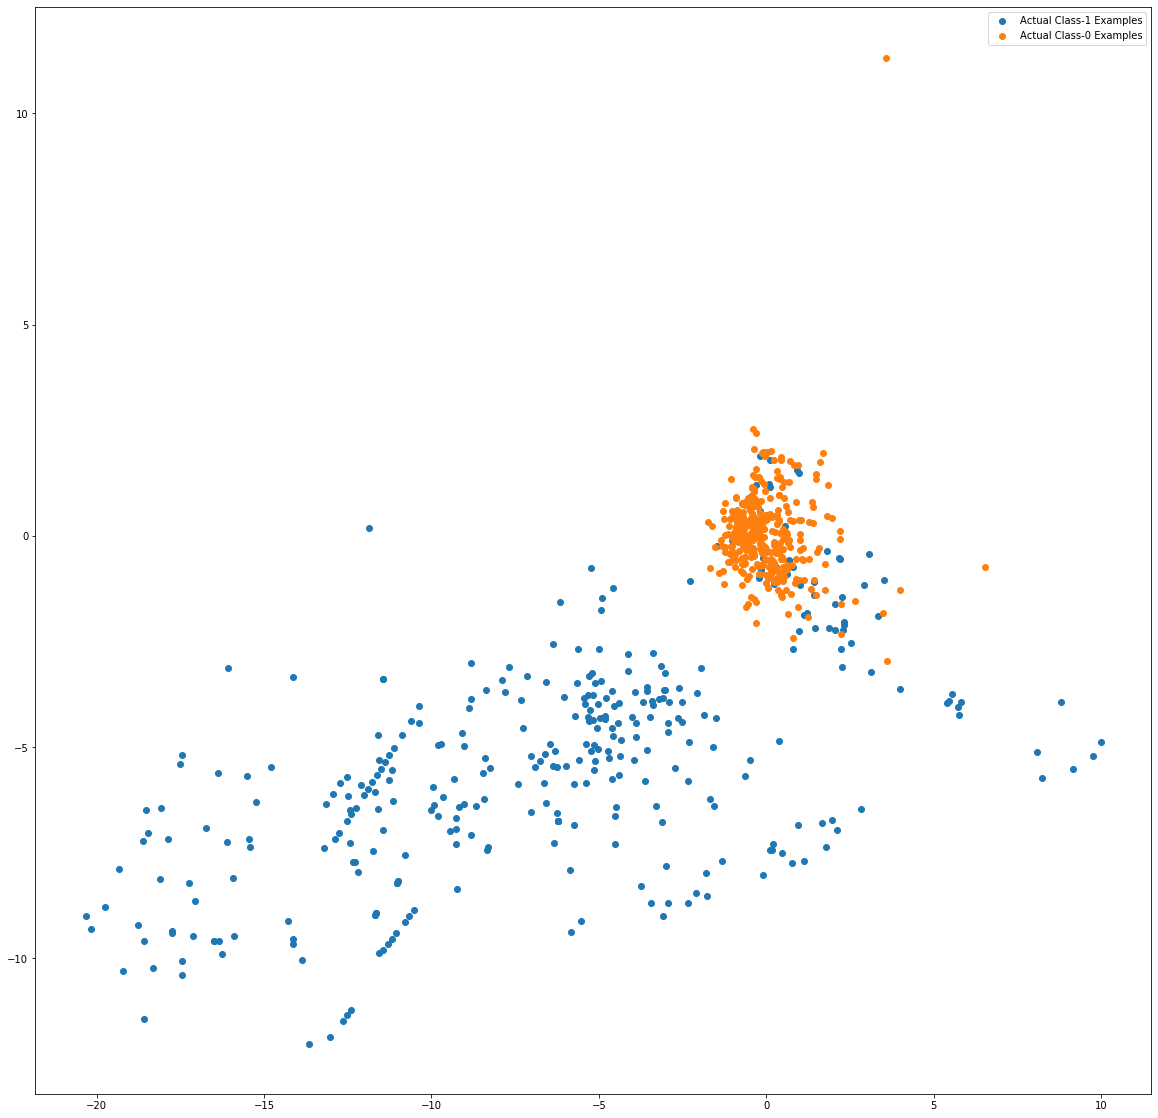

In [29]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Building different models on the balanced dataset and see the result

### Random Oversampling

Before OverSampling, counts of  '1': 350
Before OverSampling, counts of  '0': 199014 

After OverSampling using Random OverSampling, counts of '1': 199014
After OverSampling using Ramdom OverSampling, count of '0': 199014


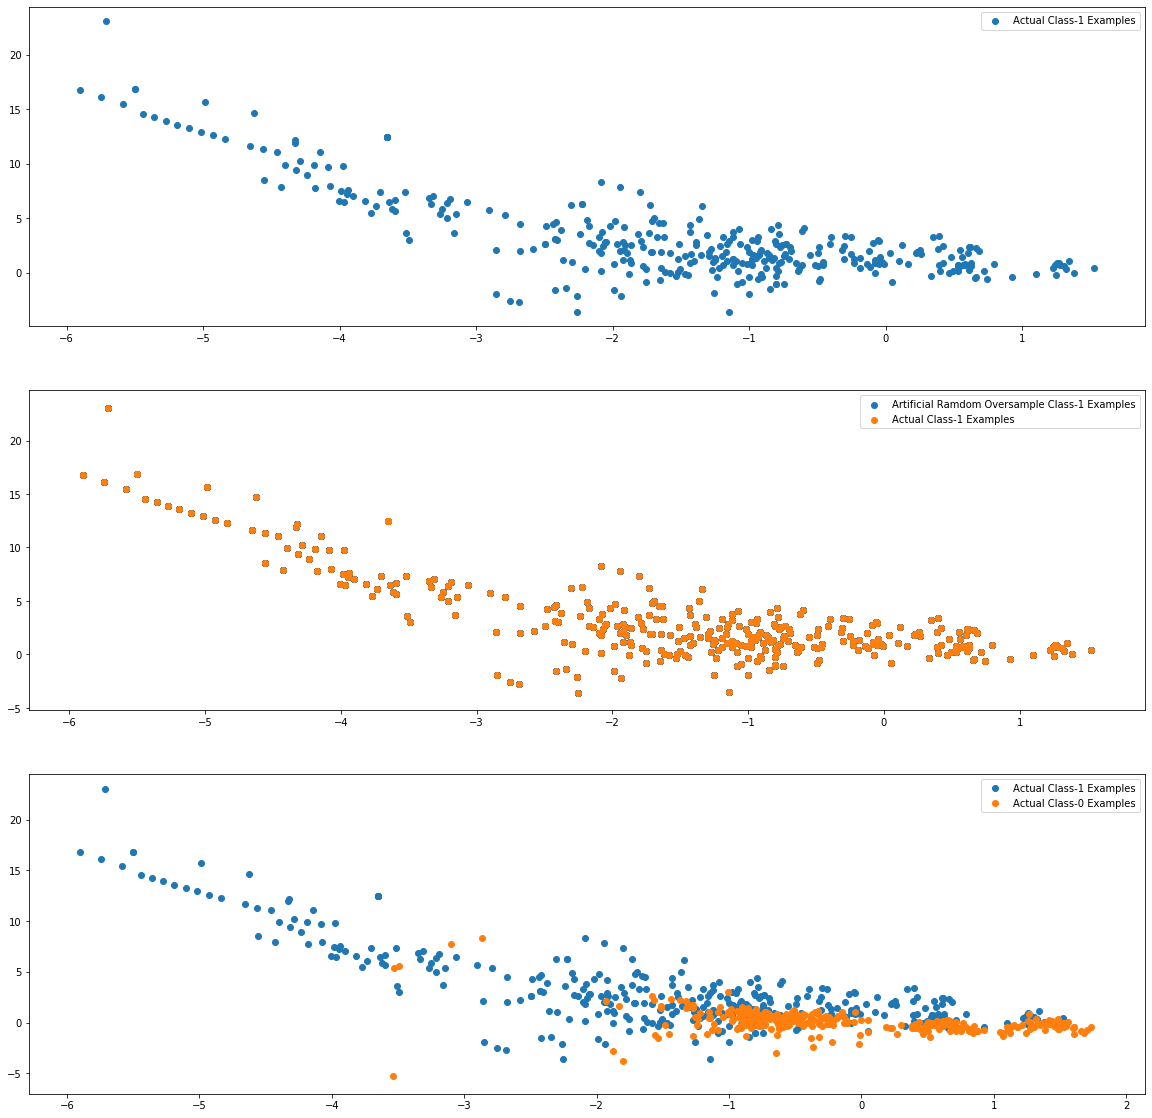

In [22]:
## Random Over Sample
oversample = RandomOverSampler(random_state = 2)

print("Before OverSampling, counts of  '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of  '0': {} \n".format(sum(y_train==0)))


X_train_rm, y_train_rm = oversample.fit_sample(X_train, y_train)

print("After OverSampling using Random OverSampling, counts of '1': {}".format(sum(y_train_rm==1)))
print("After OverSampling using Ramdom OverSampling, count of '0': {}".format(sum(y_train_rm==0)))


# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_rm_1 = X_train_rm[X_train.shape[0]:].to_numpy()


X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]




plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_rm_1[:, 0], X_train_rm_1[:, 1],label='Artificial Ramdom Oversample Class-1 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')


#plt.scatter(X_train_smote_1[:, 0], X_train_smote_1[:, 1],label='Artificial SMOTE Class-1 Examples')


plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


### Lets explore top 3 models:
- XGBoost
- Logistic Regression
- Random Forest

In [31]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)

folds = StratifiedKFold(100,shuffle = True, random_state = 100)

In [32]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [1.0, 0.1, 0.015, 0.01, 0.005]

params = {'solver' : solvers,'penalty' : penalty, 'C' : c_values}


#perform cross validation

ro_lr_model_cv = GridSearchCV(estimator = logreg, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
ro_lr_model_cv.fit(X_train_rm,y_train_rm)
cv_results = pd.DataFrame(ro_lr_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", ro_lr_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", ro_lr_model_cv.best_params_)

Fitting 100 folds for each of 30 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 48.3min finished


Best AUC train:  0.9897619619478786
Best hyperparameters:  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [33]:
# predict on test data
y_pred = ro_lr_model_cv.predict(X_test)

# check area under curve
y_pred_prob = ro_lr_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.9742


In [34]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)
# Since we have balanced the data lets redce folds
folds = StratifiedKFold(5,shuffle = True, random_state = 100)

In [35]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [1.0, 0.1, 0.015, 0.01, 0.005]

params = {'solver' : solvers,'penalty' : penalty, 'C' : c_values}


#perform cross validation

ro_lr_model_cv = GridSearchCV(estimator = logreg, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
ro_lr_model_cv.fit(X_train_rm,y_train_rm)
cv_results = pd.DataFrame(ro_lr_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", ro_lr_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", ro_lr_model_cv.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.9min finished


Best AUC train:  0.989762440243064
Best hyperparameters:  {'C': 0.015, 'penalty': 'l2', 'solver': 'liblinear'}


In [37]:
# predict on test data
y_pred = ro_lr_model_cv.predict(X_test)

# check area under curve
y_pred_prob = ro_lr_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97404


### Random Forest

In [38]:
params = {
    'max_depth': [8,9,10],
    'min_samples_leaf': [300,400,500],    
    'n_estimators': [200,300],  
    'max_features': [15,20, 25]
}
folds = StratifiedKFold(5, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
ro_final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
ro_final_rf_model_cv.fit(X_train_rm, y_train_rm)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", ro_final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", ro_final_rf_model_cv.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 174.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 281.3min finished


Best AUC train:  0.9999015787108811
Best hyperparameters:  {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 300, 'n_estimators': 300}


In [40]:
# predict on test data
y_pred = ro_final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = ro_final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.98018


In [41]:
params = {
    'max_depth': [10,11],
    'min_samples_leaf': [300],    
    'n_estimators': [300],  
    'max_features': [18,20,22]
}
folds = StratifiedKFold(5, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
ro_final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
ro_final_rf_model_cv.fit(X_train_rm, y_train_rm)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", ro_final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", ro_final_rf_model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 42.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 42.6min finished


Best AUC train:  0.9999248898840399
Best hyperparameters:  {'max_depth': 11, 'max_features': 18, 'min_samples_leaf': 300, 'n_estimators': 300}


In [45]:
# predict on test data
y_pred = ro_final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = ro_final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97932


In [46]:
params = {
    'max_depth': [11],
    'min_samples_leaf': [300],    
    'n_estimators': [300],  
    'max_features': [16,17,18,19]
}
folds = StratifiedKFold(5, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
ro_final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
ro_final_rf_model_cv.fit(X_train_rm, y_train_rm)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", ro_final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", ro_final_rf_model_cv.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed: 18.7min remaining: 18.7min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 31.8min finished


Best AUC train:  0.9999266232836007
Best hyperparameters:  {'max_depth': 11, 'max_features': 17, 'min_samples_leaf': 300, 'n_estimators': 300}


In [47]:
# predict on test data
y_pred = ro_final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = ro_final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97525


Even the model is performing more better on train but best parameters are  {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 300, 'n_estimators': 300}  since on these it gives good test auc. So lets tweek hyperparameters some more

In [50]:
params = {
    'max_depth': [9],
    'min_samples_leaf': [300],    
    'n_estimators': [300],  
    'max_features': [20]
}
folds = StratifiedKFold(5, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
ro_final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
ro_final_rf_model_cv.fit(X_train_rm, y_train_rm)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", ro_final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", ro_final_rf_model_cv.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 12.8min finished


Best AUC train:  0.9998421828619687
Best hyperparameters:  {'max_depth': 9, 'max_features': 20, 'min_samples_leaf': 300, 'n_estimators': 300}


In [51]:
# predict on test data
y_pred = ro_final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = ro_final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97655


In [54]:
params = {
    'max_depth': [10],
    'min_samples_leaf': [300],    
    'n_estimators': [300],  
    'max_features': [20]
}
folds = StratifiedKFold(5, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
ro_final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
ro_final_rf_model_cv.fit(X_train_rm, y_train_rm)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", ro_final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", ro_final_rf_model_cv.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 13.4min finished


Best AUC train:  0.9999039991950859
Best hyperparameters:  {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 300, 'n_estimators': 300}


In [55]:
# predict on test data
y_pred = ro_final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = ro_final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97879


### XGBoost

In [52]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.01,0.05,0.1], 
              'max_depth': [6,8],
              'subsample': [0.5,0.1], 
              'n_estimators': [i for i in range(50,400,100)], 
              }
folds = StratifiedKFold(5, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
ro_final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

ro_final_xg_model_cv.fit(X_train_rm, y_train_rm)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", ro_final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", ro_final_xg_model_cv.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 85.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 119.5min finished


Best AUC train:  0.9999933154159469
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 350, 'objective': 'binary:logistic', 'subsample': 0.5}


In [53]:
y_pred = ro_final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = ro_final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.98001


In [56]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.1,0.2], 
              'max_depth': [6,7,8],
              'subsample': [0.5], 
              'n_estimators': [350,450], 
              }
folds = StratifiedKFold(5, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
ro_final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

ro_final_xg_model_cv.fit(X_train_rm, y_train_rm)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", ro_final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", ro_final_xg_model_cv.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 50.9min finished


Best AUC train:  0.9999950138532429
Best hyperparameters:  {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 350, 'objective': 'binary:logistic', 'subsample': 0.5}


In [57]:
y_pred = ro_final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = ro_final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97642


In [58]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.1], 
              'max_depth': [8],
              'subsample': [0.5], 
              'n_estimators': [350], 
              }
folds = StratifiedKFold(5, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
ro_final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

ro_final_xg_model_cv.fit(X_train_rm, y_train_rm)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", ro_final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", ro_final_xg_model_cv.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.6min finished


Best AUC train:  0.9999933154159469
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 350, 'objective': 'binary:logistic', 'subsample': 0.5}


In [59]:
y_pred = ro_final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = ro_final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.98001


### Print the class distribution after applying SMOTE 

After OverSampling using Smote, counts of '1': 199014
After OverSampling using Smote, counts of '0': 199014


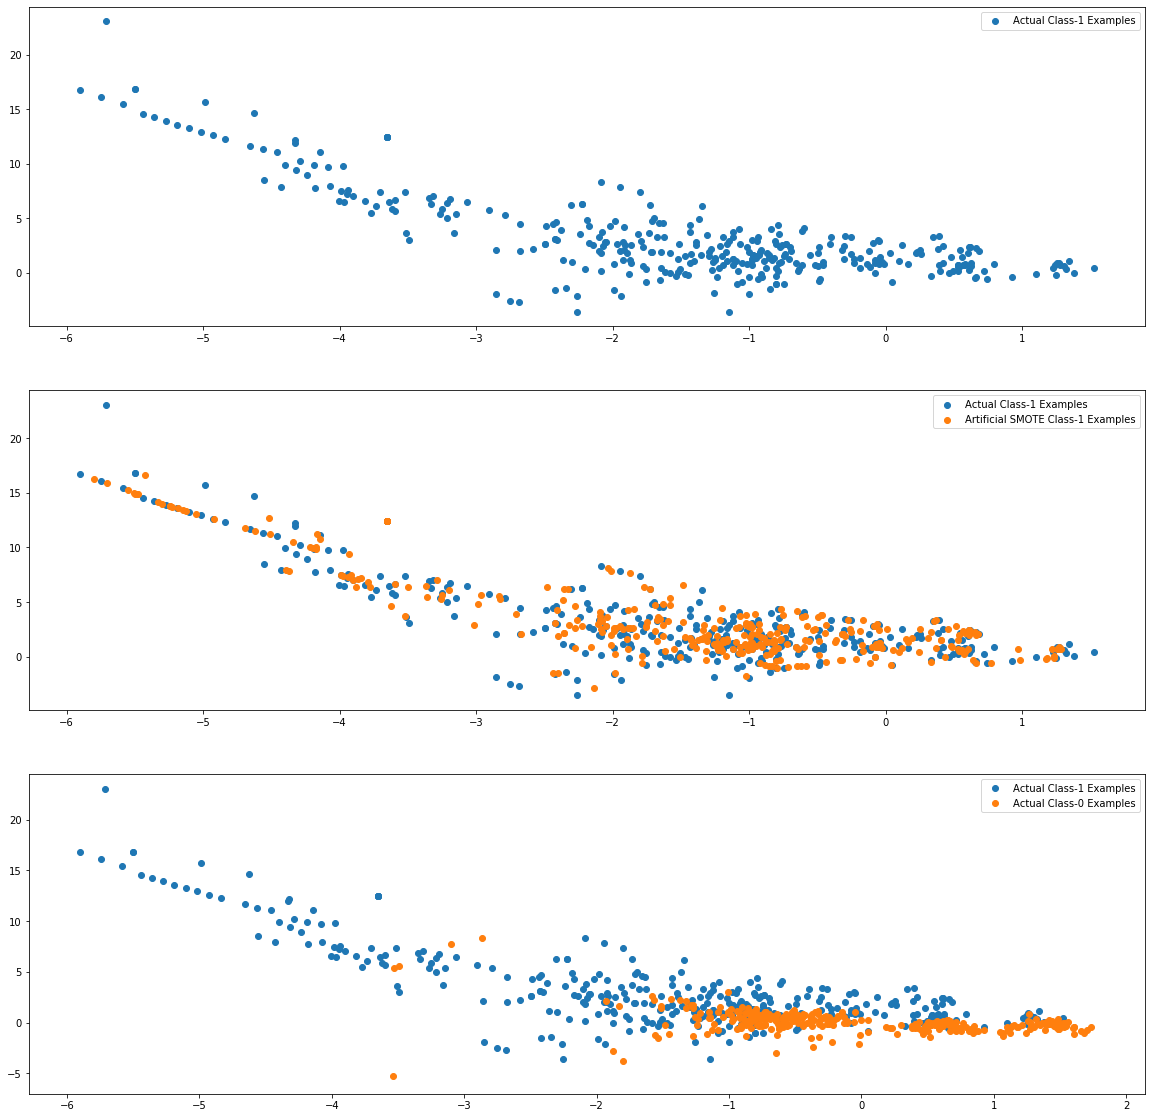

In [25]:
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print("After OverSampling using Smote, counts of '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling using Smote, counts of '0': {}".format(sum(y_train_smote==0)))
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:].to_numpy()

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [66]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)

folds = StratifiedKFold(5,shuffle = True, random_state = 100)

In [67]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [1.0, 0.1, 0.015, 0.01, 0.005]

params = {'solver' : solvers,'penalty' : penalty, 'C' : c_values}


#perform cross validation

smote_lr_model_cv = GridSearchCV(estimator = logreg, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
smote_lr_model_cv.fit(X_train_smote,y_train_smote)
cv_results = pd.DataFrame(smote_lr_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_lr_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_lr_model_cv.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.9min finished


Best AUC train:  0.9907625711537715
Best hyperparameters:  {'C': 0.015, 'penalty': 'l2', 'solver': 'liblinear'}


In [68]:
# predict on test data
y_pred = smote_lr_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_lr_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97419


In [69]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)
# Since we have balanced the data lets redce folds
folds = StratifiedKFold(5,shuffle = True, random_state = 100)

In [70]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [0.13, 0.015, 0.017]

params = {'solver' : solvers,'penalty' : penalty, 'C' : c_values}


#perform cross validation

smote_lr_model_cv = GridSearchCV(estimator = logreg, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
smote_lr_model_cv.fit(X_train_smote,y_train_smote)
cv_results = pd.DataFrame(smote_lr_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_lr_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_lr_model_cv.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.2min finished


Best AUC train:  0.9907634692302618
Best hyperparameters:  {'C': 0.017, 'penalty': 'l2', 'solver': 'liblinear'}


In [71]:
# predict on test data
y_pred = smote_lr_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_lr_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97422


In [69]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)
# Since we have balanced the data lets redce folds
folds = StratifiedKFold(5,shuffle = True, random_state = 100)

In [72]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [0.017,0.02,0.03]

params = {'solver' : solvers,'penalty' : penalty, 'C' : c_values}


#perform cross validation

smote_lr_model_cv = GridSearchCV(estimator = logreg, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
smote_lr_model_cv.fit(X_train_smote,y_train_smote)
cv_results = pd.DataFrame(smote_lr_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_lr_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_lr_model_cv.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.2min finished


Best AUC train:  0.9907638128628318
Best hyperparameters:  {'C': 0.02, 'penalty': 'l2', 'solver': 'liblinear'}


In [73]:
# predict on test data
y_pred = smote_lr_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_lr_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97425


In [69]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)
# Since we have balanced the data lets redce folds
folds = StratifiedKFold(5,shuffle = True, random_state = 100)

In [74]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [0.019,0.02,0.025]

params = {'solver' : solvers,'penalty' : penalty, 'C' : c_values}


#perform cross validation

smote_lr_model_cv = GridSearchCV(estimator = logreg, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
smote_lr_model_cv.fit(X_train_smote,y_train_smote)
cv_results = pd.DataFrame(smote_lr_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_lr_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_lr_model_cv.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.2min finished


Best AUC train:  0.9907638517465198
Best hyperparameters:  {'C': 0.019, 'penalty': 'l2', 'solver': 'liblinear'}


In [75]:
# predict on test data
y_pred = smote_lr_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_lr_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97424


In [76]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)
# Since we have balanced the data lets redce folds
folds = StratifiedKFold(5,shuffle = True, random_state = 100)

In [79]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [ 0.017,0.018,0.019]

params = {'solver' : solvers,'penalty' : penalty, 'C' : c_values}


#perform cross validation

smote_lr_model_cv = GridSearchCV(estimator = logreg, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
smote_lr_model_cv.fit(X_train_smote,y_train_smote)
cv_results = pd.DataFrame(smote_lr_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_lr_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_lr_model_cv.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.2min finished


Best AUC train:  0.9907638517465198
Best hyperparameters:  {'C': 0.019, 'penalty': 'l2', 'solver': 'liblinear'}


In [80]:
# predict on test data
y_pred = smote_lr_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_lr_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97424


### Random Forest

In [ ]:
params = {
    'max_depth': [8,9,10],
    'min_samples_leaf': [300,400,500],    
    'n_estimators': [200,300],  
    'max_features': [15,20, 25]
}
folds = StratifiedKFold(5, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
smote_final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
smote_final_rf_model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_final_rf_model_cv.best_params_)

Best AUC train:  0.9992982608574567
Best hyperparameters:  {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 300, 'n_estimators': 300}


In [82]:
# predict on test data
y_pred = smote_final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97724


In [84]:
params = {
    'max_depth': [10],
    'min_samples_leaf': [300],    
    'n_estimators': [300],  
    'max_features': [13,15,17]
}
folds = StratifiedKFold(5, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
smote_final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
smote_final_rf_model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_final_rf_model_cv.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 24.7min finished


Best AUC train:  0.9992979742815254
Best hyperparameters:  {'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 300, 'n_estimators': 300}


In [85]:
# predict on test data
y_pred = smote_final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97908


In [86]:
params = {
    'max_depth': [10],
    'min_samples_leaf': [300],    
    'n_estimators': [300],  
    'max_features': [10,11,12,13]
}
folds = StratifiedKFold(5, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
smote_final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
smote_final_rf_model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_final_rf_model_cv.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed: 18.6min remaining: 18.6min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 31.7min finished


Best AUC train:  0.9993030294826442
Best hyperparameters:  {'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 300, 'n_estimators': 300}


In [87]:
# predict on test data
y_pred = smote_final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97881


Even the model is performing more better on train but best parameters are  {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 300, 'n_estimators': 300}  since on these it gives good test auc. So lets tweek hyperparameters some more

In [90]:
params = {
    'max_depth': [10],
    'min_samples_leaf': [300],    
    'n_estimators': [300],  
    'max_features': [14,13]
}
folds = StratifiedKFold(5, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
smote_final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
smote_final_rf_model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_final_rf_model_cv.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 18.7min finished


Best AUC train:  0.999277951463271
Best hyperparameters:  {'max_depth': 10, 'max_features': 14, 'min_samples_leaf': 300, 'n_estimators': 300}


In [91]:
# predict on test data
y_pred = smote_final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97812


In [92]:
params = {
    'max_depth': [10],
    'min_samples_leaf': [300],    
    'n_estimators': [300],  
    'max_features': [13]
}
folds = StratifiedKFold(5, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
smote_final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
smote_final_rf_model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_final_rf_model_cv.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 14.6min finished


Best AUC train:  0.9992936682922358
Best hyperparameters:  {'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 300, 'n_estimators': 300}


In [93]:
# predict on test data
y_pred = smote_final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97796


### XGBoost

In [88]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.01,0.05,0.1], 
              'max_depth': [6,8],
              'subsample': [0.5,0.1], 
              'n_estimators': [i for i in range(50,400,100)], 
              }
folds = StratifiedKFold(5, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
smote_final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

smote_final_xg_model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_final_xg_model_cv.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 88.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 125.1min finished


Best AUC train:  0.9999914856590385
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 350, 'objective': 'binary:logistic', 'subsample': 0.5}


In [89]:
y_pred = smote_final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.96207


In [94]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.1,0.2], 
              'max_depth': [6,7,8],
              'subsample': [0.5], 
              'n_estimators': [350,450], 
              }
folds = StratifiedKFold(5, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
smote_final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

smote_final_xg_model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_final_xg_model_cv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 59.5min finished


Best AUC train:  0.9999923133686979
Best hyperparameters:  {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 450, 'objective': 'binary:logistic', 'subsample': 0.5}


In [95]:
y_pred = smote_final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.96445


In [96]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.3,0.2], 
              'max_depth': [5,6,7],
              'subsample': [0.5], 
              'n_estimators': [450], 
              }
folds = StratifiedKFold(5, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
smote_final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

smote_final_xg_model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_final_xg_model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 28.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 28.2min finished


Best AUC train:  0.9999931598236396
Best hyperparameters:  {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 450, 'objective': 'binary:logistic', 'subsample': 0.5}


In [97]:
y_pred = smote_final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.96612


In [98]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.3,0.25,0.4], 
              'max_depth': [6],
              'subsample': [0.5], 
              'n_estimators': [450], 
              }
folds = StratifiedKFold(5, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
smote_final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

smote_final_xg_model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_final_xg_model_cv.best_params_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 13.1min finished


Best AUC train:  0.9999931598236396
Best hyperparameters:  {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 450, 'objective': 'binary:logistic', 'subsample': 0.5}


In [99]:
y_pred = smote_final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.96612


In [100]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.3,0.35,0.27], 
              'max_depth': [6],
              'subsample': [0.5], 
              'n_estimators': [450], 
              }
folds = StratifiedKFold(5, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
smote_final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

smote_final_xg_model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", smote_final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", smote_final_xg_model_cv.best_params_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 13.1min finished


Best AUC train:  0.9999931598236396
Best hyperparameters:  {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 450, 'objective': 'binary:logistic', 'subsample': 0.5}


In [101]:
y_pred = smote_final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = smote_final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.96612


### Print the class distribution after applying ADASYN

After OverSampling using ADASYN, counts of '1': 199014
After OverSampling using ADASYN, counts of '0': 199014


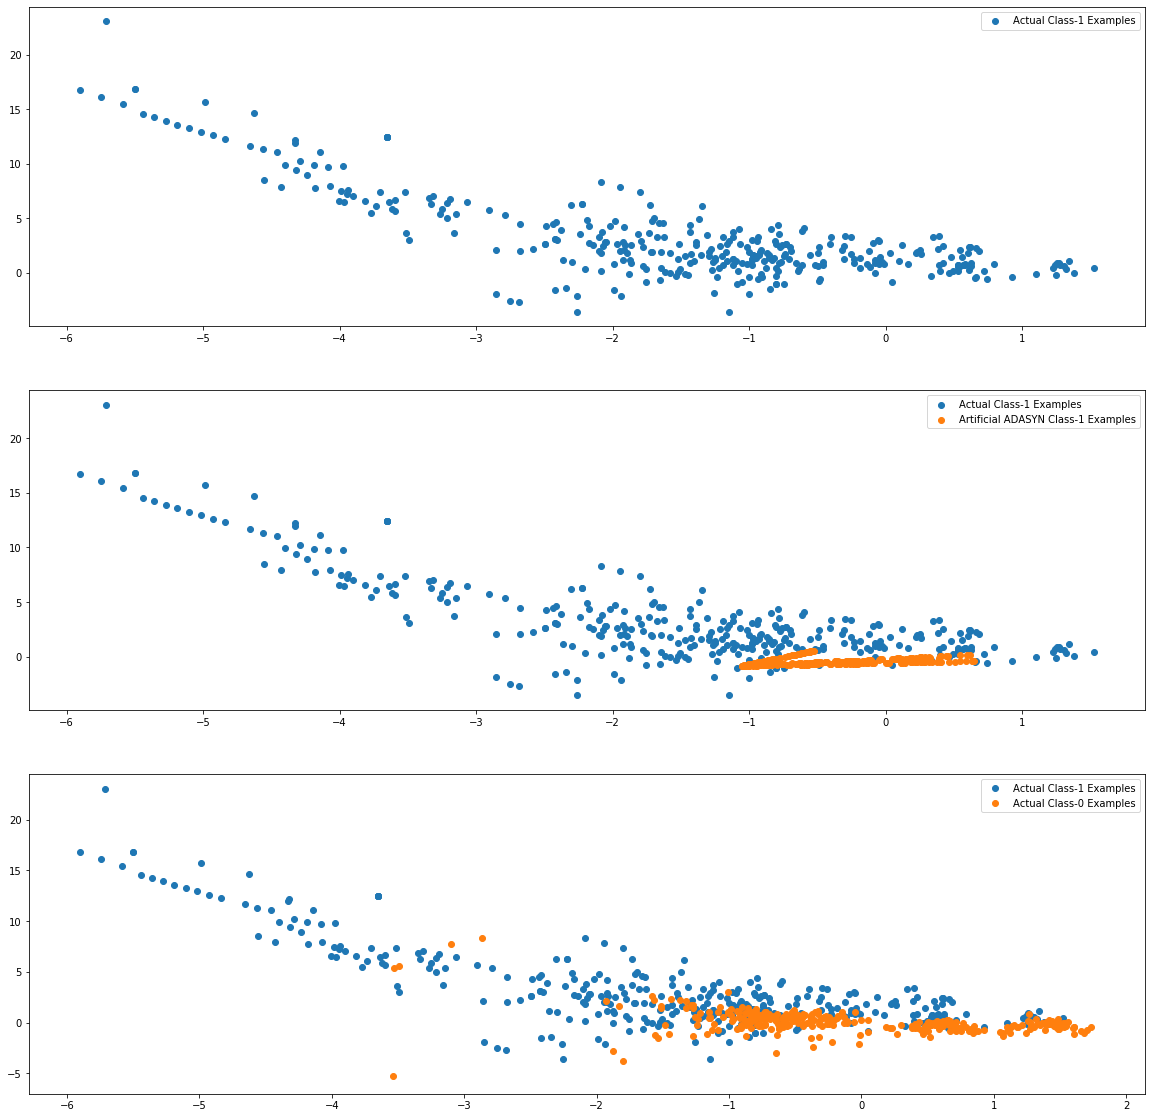

In [26]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
print("After OverSampling using ADASYN, counts of '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling using ADASYN, counts of '0': {}".format(sum(y_train_smote==0)))
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:].to_numpy()

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on ADASYN

In [106]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)

folds = StratifiedKFold(5,shuffle = True, random_state = 100)

In [107]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [1.0, 0.1, 0.015, 0.01, 0.005]

params = {'solver' : solvers,'penalty' : penalty, 'C' : c_values}


#perform cross validation

adasyn_lr_model_cv = GridSearchCV(estimator = logreg, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
adasyn_lr_model_cv.fit(X_train_adasyn,y_train_adasyn)
cv_results = pd.DataFrame(adasyn_lr_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", adasyn_lr_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", adasyn_lr_model_cv.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.5min finished


Best AUC train:  0.9666724804637339
Best hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [108]:
# predict on test data
y_pred = adasyn_lr_model_cv.predict(X_test)

# check area under curve
y_pred_prob = adasyn_lr_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97001


In [69]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)
# Since we have balanced the data lets redce folds
folds = StratifiedKFold(5,shuffle = True, random_state = 100)

In [109]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [0.8, 0.1, 0.12]

params = {'solver' : solvers,'penalty' : penalty, 'C' : c_values}


#perform cross validation

adasyn_lr_model_cv = GridSearchCV(estimator = logreg, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
adasyn_lr_model_cv.fit(X_train_adasyn,y_train_adasyn)
cv_results = pd.DataFrame(adasyn_lr_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", adasyn_lr_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", adasyn_lr_model_cv.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.5min finished


Best AUC train:  0.9666725403039287
Best hyperparameters:  {'C': 0.12, 'penalty': 'l2', 'solver': 'liblinear'}


In [110]:
# predict on test data
y_pred = adasyn_lr_model_cv.predict(X_test)

# check area under curve
y_pred_prob = adasyn_lr_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97001


In [69]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)
# Since we have balanced the data lets redce folds
folds = StratifiedKFold(5,shuffle = True, random_state = 100)

In [111]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [0.11, 0.12, 0.13]

params = {'solver' : solvers,'penalty' : penalty, 'C' : c_values}


#perform cross validation

adasyn_lr_model_cv = GridSearchCV(estimator = logreg, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)


#Fitting the model
adasyn_lr_model_cv.fit(X_train_adasyn,y_train_adasyn)
cv_results = pd.DataFrame(adasyn_lr_model_cv.cv_results_)
cv_results
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", adasyn_lr_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", adasyn_lr_model_cv.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.6min finished


Best AUC train:  0.9666725549464994
Best hyperparameters:  {'C': 0.11, 'penalty': 'l2', 'solver': 'liblinear'}


In [112]:
# predict on test data
y_pred = adasyn_lr_model_cv.predict(X_test)

# check area under curve
y_pred_prob = adasyn_lr_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97001


### Random Forest

In [113]:
params = {
    'max_depth': [8,9,10],
    'min_samples_leaf': [300,400,500],    
    'n_estimators': [200,300],  
    'max_features': [15,20, 25]
}
folds = StratifiedKFold(5, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
adasyn_final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
adasyn_final_rf_model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 236.4min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 382.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10], 'max_features': [15, 20, 25],
                         'min_samples_leaf': [300, 400, 500],
                         'n_estimators': [200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [114]:
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", adasyn_final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", adasyn_final_rf_model_cv.best_params_)

Best AUC train:  0.9992173249629642
Best hyperparameters:  {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 300, 'n_estimators': 300}


In [116]:
# predict on test data
y_pred = adasyn_final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = adasyn_final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97057


In [117]:
params = {
    'max_depth': [10,11],
    'min_samples_leaf': [300],    
    'n_estimators': [300],  
    'max_features': [15,17,13]
}
folds = StratifiedKFold(5, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
adasyn_final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
adasyn_final_rf_model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", adasyn_final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", adasyn_final_rf_model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 45.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 45.2min finished


Best AUC train:  0.999405688391074
Best hyperparameters:  {'max_depth': 11, 'max_features': 13, 'min_samples_leaf': 300, 'n_estimators': 300}


In [118]:
# predict on test data
y_pred = adasyn_final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = adasyn_final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.97361


In [123]:
params = {
    'max_depth': [11],
    'min_samples_leaf': [300],    
    'n_estimators': [300],  
    'max_features': [14,16,13]
}
folds = StratifiedKFold(5, shuffle = True, random_state = 100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
adasyn_final_rf_model_cv = GridSearchCV(estimator = rf, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)
adasyn_final_rf_model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", adasyn_final_rf_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", adasyn_final_rf_model_cv.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 22.6min finished


Best AUC train:  0.9994190459722425
Best hyperparameters:  {'max_depth': 11, 'max_features': 13, 'min_samples_leaf': 300, 'n_estimators': 300}


In [125]:
# predict on test data
y_pred = adasyn_final_rf_model_cv.predict(X_test)

# check area under curve
y_pred_prob = adasyn_final_rf_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.9728


### XGBoost

In [121]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.01,0.05,0.1], 
              'max_depth': [6,8],
              'subsample': [0.5,0.1], 
              'n_estimators': [i for i in range(50,400,100)], 
              }
folds = StratifiedKFold(5, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
adasyn_final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

adasyn_final_xg_model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", adasyn_final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", adasyn_final_xg_model_cv.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 65.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 92.5min finished


Best AUC train:  0.9999903624925439
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 350, 'objective': 'binary:logistic', 'subsample': 0.5}


In [122]:
y_pred = adasyn_final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = adasyn_final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.96051


In [126]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.1,0.2], 
              'max_depth': [6,7,8],
              'subsample': [0.5], 
              'n_estimators': [350,450], 
              }
folds = StratifiedKFold(5, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
adasyn_final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

adasyn_final_xg_model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", adasyn_final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", adasyn_final_xg_model_cv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 50.8min finished


Best AUC train:  0.9999908057857197
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 450, 'objective': 'binary:logistic', 'subsample': 0.5}


In [127]:
y_pred = adasyn_final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = adasyn_final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.95996


In [128]:
params =  {
              'objective':['binary:logistic'],
              'learning_rate': [0.12,0.08,0.1], 
              'max_depth': [5,6,7],
              'subsample': [0.5], 
              'n_estimators': [450], 
              }
folds = StratifiedKFold(5, shuffle = True, random_state = 100)

xgb=XGBClassifier()

# Instantiate the grid search model
adasyn_final_xg_model_cv = GridSearchCV(estimator = xgb, param_grid = params, scoring ='roc_auc', cv=folds, \
                       return_train_score=True, verbose = 1, n_jobs=-1)

adasyn_final_xg_model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print("Best AUC train: ", adasyn_final_xg_model_cv.best_score_)

#print the optimum value of hyperparameters

print("Best hyperparameters: ", adasyn_final_xg_model_cv.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 37.3min finished


Best AUC train:  0.9999908057857197
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 450, 'objective': 'binary:logistic', 'subsample': 0.5}


In [129]:
y_pred = adasyn_final_xg_model_cv.predict(X_test)

# check area under curve
y_pred_prob = adasyn_final_xg_model_cv.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.95996


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [43]:
# perform the best oversampling method on X_train & y_train
# Adasyn Logistic regression

#clf = LogisticRegression(C= 0.1, penalty ='l2', solver = 'liblinear')  #initialise the model with optimum hyperparameters
#clf.fit(X_train,y_train )
#y_pred = clf.predict(X_test)

# check area under curve
#y_pred_prob = clf.predict_proba(X_test)[:, 1]
#print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))


# Adasy Random forest

#clf = RandomForestClassifier(max_depth= 10, max_features= 15, min_samples_leaf= 300, n_estimators= 300)
#clf.fit(X_train,y_train )
#y_pred = clf.predict(X_test)

# check area under curve
#y_pred_prob = clf.predict_proba(X_test)[:, 1]
#print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))




AUC test:    	 0.96738
AUC test:    	 0.97411


In [30]:
# perform the best oversampling method on X_train & y_train
# Randon Oversampling XGBoost

clf = XGBClassifier(objective='binary:logistic',learning_rate=.1, max_depth=8, n_estimators=350, subsample=0.5, n_jobs=-1)
clf.fit(X_train_rm, y_train_rm )
y_pred = clf.predict(X_test)

# check area under curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

# XGBoost regression

clf = XGBClassifier(objective='binary:logistic',learning_rate=.1, max_depth=6, n_estimators=250, subsample=0.5, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# check area under curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
print("AUC test:    \t", round(roc_auc_score(y_test, y_pred_prob),5))

AUC test:    	 0.98001
AUC test:    	 0.98194


### Print the important features of the best model to understand the dataset

Top var = 17
2nd Top var = 14
3rd Top var = 12


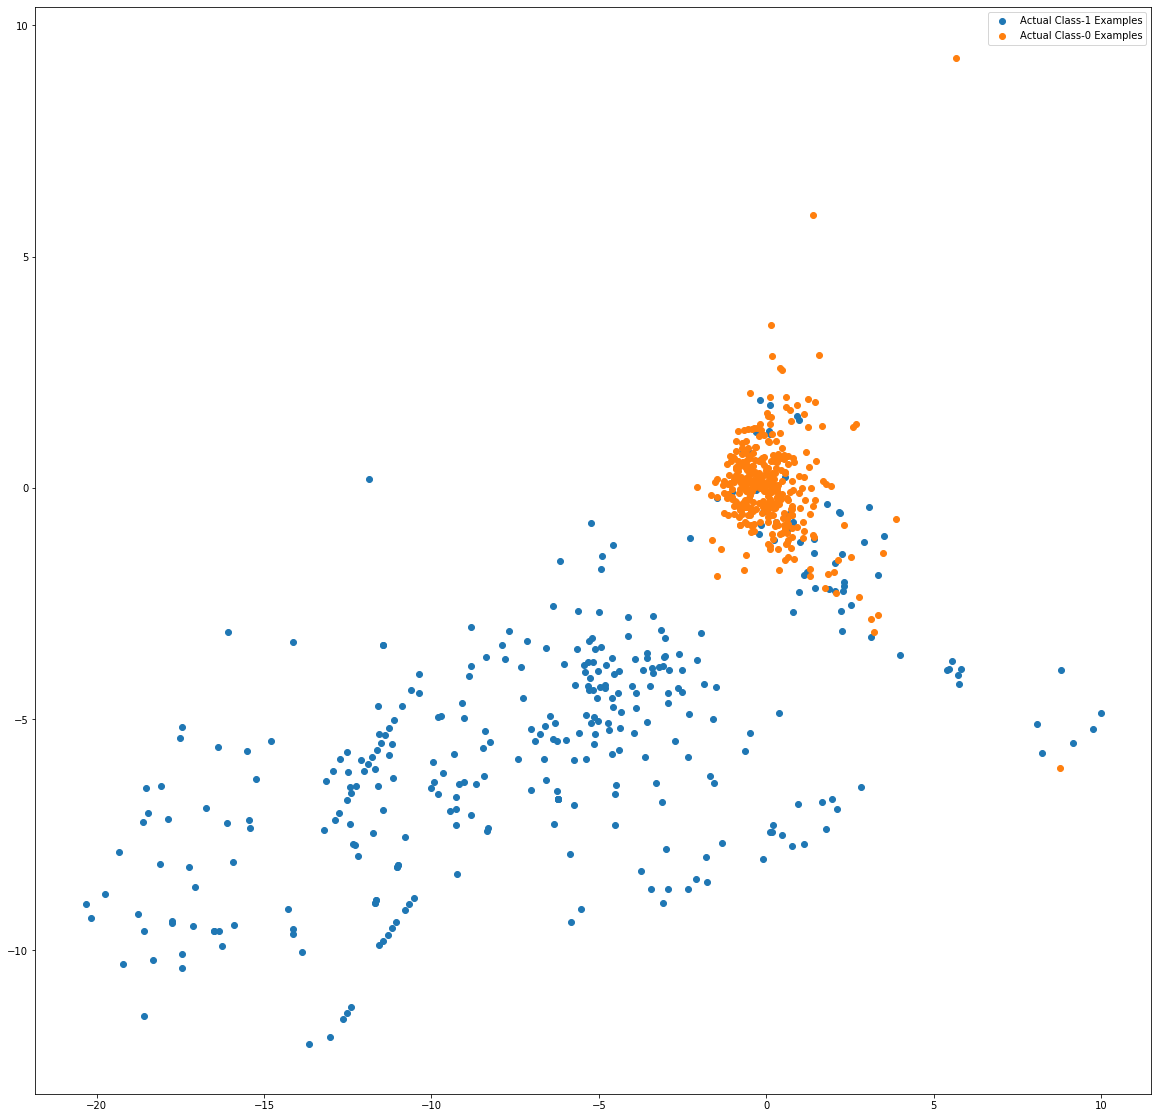

In [31]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()